In [ ]:
# https://github.com/awslabs/amazon-sagemaker-examples/blob/master/advanced_functionality/working_with_redshift_data/working_with_redshift_data.ipynb

In [1]:
import os
import boto3
import pandas as pd
import json
import psycopg2
import sqlalchemy as sa
import json

In [2]:
credfile = 'redshift_creds_template.json.nogit'

# Read credentials to a dictionary
with open(credfile) as fh:
    creds = json.loads(fh.read())

def get_conn(creds): 
    conn = psycopg2.connect(dbname=creds['db_name'], 
                            user=creds['username'], 
                            password=creds['password'],
                            port=creds['port_num'],
                            host=creds['host_name'])
    return conn

def get_df(creds, query):
    with get_conn(creds) as conn:
        with conn.cursor() as cur:
            cur.execute(query)
            result_set = cur.fetchall()
            colnames = [desc.name for desc in cur.description]
            df = pd.DataFrame.from_records(result_set, columns=colnames)
    return df

In [3]:
sql = "select table_name from information_schema.tables where table_name like 'awsbilling%'"
table_df = get_df(creds, sql)
table_df

,table_name
0,awsbilling201608
1,awsbilling201609_tagmapping
2,awsbilling201608_tagmapping
3,awsbilling201609
4,awsbilling201610
5,awsbilling201610_tagmapping
6,awsbilling201611
7,awsbilling201611_tagmapping
8,awsbilling201612
9,awsbilling201612_tagmapping


In [4]:
import os
import boto3
region = os.getenv('AWS_DEFAULT_REGION')
s3 = boto3.client('s3', region_name=region)

s3_bucket = 'sungardas-aws-services-billing-graphimagebucket-lv7d7riqedp7'
prefix = 'dataframes/'

In [5]:
# import all dataframes from s3 bucket

import pickle

all_df = pd.DataFrame()

response = s3.list_objects(Bucket=s3_bucket, Prefix=prefix)
for obj in response['Contents']:
    month_response = s3.get_object(Bucket=s3_bucket, Key=obj['Key'])
    month_df = pickle.loads(month_response['Body'].read())
    print("{} dataframe has been imported".format(obj['Key']))
    #print(month_df.head())
    all_df = pd.concat([all_df, month_df], ignore_index=True)

print("all dataframes have been imported")
all_df

dataframes/201608_by_day.pkl dataframe has been imported
dataframes/201609_by_day.pkl dataframe has been imported
dataframes/201610_by_day.pkl dataframe has been imported
dataframes/201611_by_day.pkl dataframe has been imported
dataframes/201612_by_day.pkl dataframe has been imported
dataframes/201701_by_day.pkl dataframe has been imported
dataframes/201702_by_day.pkl dataframe has been imported
dataframes/201703_by_day.pkl dataframe has been imported
dataframes/201704_by_day.pkl dataframe has been imported
dataframes/201705_by_day.pkl dataframe has been imported
dataframes/201706_by_day.pkl dataframe has been imported
dataframes/201707_by_day.pkl dataframe has been imported
dataframes/201708_by_day.pkl dataframe has been imported
dataframes/201709_by_day.pkl dataframe has been imported
dataframes/201710_by_day.pkl dataframe has been imported
dataframes/201711_by_day.pkl dataframe has been imported
dataframes/201712_by_day.pkl dataframe has been imported
dataframes/201801_by_day.pkl da

,enddatetime,lineitem_usageaccountid,lineitem_productcode,usage_amount,blended,unblended
0,2016-08-01,041802784822,AWSCloudTrail,1086,0.00,0.00
1,2016-08-01,041802784822,AWSConfig,49,0.15,0.15
2,2016-08-01,041802784822,AWSQueueService,2597,0.00,0.00
3,2016-08-01,041802784822,AmazonDynamoDB,10,0.00,0.00
4,2016-08-01,041802784822,AmazonEC2,75327,1.20,1.20
5,2016-08-01,041802784822,AmazonS3,331,0.00,0.00
6,2016-08-01,041802784822,AmazonSNS,59,0.00,0.00
7,2016-08-01,050132637519,AWSCloudTrail,451092,0.00,0.00
8,2016-08-01,050132637519,AWSConfig,32,0.10,0.10
9,2016-08-01,050132637519,AWSLambda,1425,0.00,0.00


In [6]:
# find the current month data

import datetime
from dateutil.relativedelta import relativedelta
from dateutil import parser

current_date = datetime.datetime.today()

sql = "select substring(cast(lineitem_usageenddate as datetime) from 1 for 10) enddatetime, lineItem_UsageAccountId, lineitem_productcode,"
sql += " sum(lineItem_UsageAmount) usage_amount,"
sql += " to_char(sum(cast(lineItem_BlendedCost as float)), 'FM999,999,999,990D00') blended,"
sql += " to_char(sum(cast(lineitem_unblendedcost as float)), 'FM999,999,999,990D00') unblended"
sql += " from AWSBilling%s" % (current_date.strftime('%Y%m'))
sql += " where lineitem_lineitemtype != 'Tax'"
sql += " and lineitem_usageenddate >= '%s'" % (current_date.strftime('%Y-%m-01'))
sql += " and lineitem_usageenddate < '%s'" % (current_date.strftime('%Y-%m-%d'))
sql += " group by enddatetime, lineItem_UsageAccountId, lineitem_productcode"
sql += " order by enddatetime, lineItem_UsageAccountId, lineitem_productcode"
print(sql)
current_df = get_df(creds, sql)
current_df

select substring(cast(lineitem_usageenddate as datetime) from 1 for 10) enddatetime, lineItem_UsageAccountId, lineitem_productcode, sum(lineItem_UsageAmount) usage_amount, to_char(sum(cast(lineItem_BlendedCost as float)), 'FM999,999,999,990D00') blended, to_char(sum(cast(lineitem_unblendedcost as float)), 'FM999,999,999,990D00') unblended from AWSBilling201802 where lineitem_lineitemtype != 'Tax' and lineitem_usageenddate >= '2018-02-01' and lineitem_usageenddate < '2018-02-17' group by enddatetime, lineItem_UsageAccountId, lineitem_productcode order by enddatetime, lineItem_UsageAccountId, lineitem_productcode


,enddatetime,lineitem_usageaccountid,lineitem_productcode,usage_amount,blended,unblended
0,2018-02-01,014458831776,AWSCloudTrail,6737,0.00,0.00
1,2018-02-01,014458831776,AmazonS3,5429,0.01,0.01
2,2018-02-01,015468674240,AWSCloudTrail,6406,0.00,0.00
3,2018-02-01,015468674240,AmazonEC2,23,0.11,0.11
4,2018-02-01,015468674240,AmazonS3,5130,0.01,0.01
5,2018-02-01,018259383398,AWSCloudTrail,6129,0.00,0.00
6,2018-02-01,018259383398,AmazonS3,4951,0.01,0.01
7,2018-02-01,023013128792,AWSCloudTrail,6494,0.00,0.00
8,2018-02-01,023013128792,AmazonS3,5107,0.01,0.01
9,2018-02-01,027391513213,AWSCloudTrail,3789,0.00,0.00


In [7]:
# merge the current data into all
all_df = pd.concat([all_df, current_df], ignore_index=True)
all_df

,enddatetime,lineitem_usageaccountid,lineitem_productcode,usage_amount,blended,unblended
0,2016-08-01,041802784822,AWSCloudTrail,1086,0.00,0.00
1,2016-08-01,041802784822,AWSConfig,49,0.15,0.15
2,2016-08-01,041802784822,AWSQueueService,2597,0.00,0.00
3,2016-08-01,041802784822,AmazonDynamoDB,10,0.00,0.00
4,2016-08-01,041802784822,AmazonEC2,75327,1.20,1.20
5,2016-08-01,041802784822,AmazonS3,331,0.00,0.00
6,2016-08-01,041802784822,AmazonSNS,59,0.00,0.00
7,2016-08-01,050132637519,AWSCloudTrail,451092,0.00,0.00
8,2016-08-01,050132637519,AWSConfig,32,0.10,0.10
9,2016-08-01,050132637519,AWSLambda,1425,0.00,0.00


In [8]:
valid_df = all_df[(all_df['blended'] >= '1.00') | (all_df['unblended'] >= '1.00')]
valid_df

,enddatetime,lineitem_usageaccountid,lineitem_productcode,usage_amount,blended,unblended
4,2016-08-01,041802784822,AmazonEC2,75327,1.20,1.20
12,2016-08-01,050132637519,AmazonEC2,81121,33.58,33.57
14,2016-08-01,050132637519,AmazonES,23,2.16,2.16
15,2016-08-01,050132637519,AmazonRDS,3122653,53.99,53.99
23,2016-08-01,054649790173,AmazonEC2,7118222,8.26,8.24
26,2016-08-01,054649790173,AmazonRoute53,29328,2.08,3.01
30,2016-08-01,054649790173,AmazonVPC,23,1.15,1.15
35,2016-08-01,059504812767,AmazonEC2,56127,42.33,42.32
36,2016-08-01,059504812767,AmazonRDS,23,19.25,19.25
40,2016-08-01,059504812767,AmazonVPC,23,1.15,1.15


In [9]:
services = valid_df.lineitem_productcode.unique()
print(services)
print(len(services))

['AmazonEC2' 'AmazonES' 'AmazonRDS' 'AmazonRoute53' 'AmazonVPC' 'AWSConfig'
 'AmazonDynamoDB' 'AmazonElastiCache' 'AmazonRedshift' 'awskms'
 'AWSCloudTrail' 'AmazonKinesis' 'AmazonWorkSpaces' 'AWSDirectoryService'
 'AmazonCloudWatch' 'AmazonS3' 'ElasticMapReduce' 'AWSSupportBusiness'
 'AWSLambda' 'AWSCodePipeline' 'eatuvsbbicw1b4cx89ppozcjt'
 '80uds1joqwlz35hw1lx5h1bcc' '9fmjj3b9hombuy4jawab1i13i' 'CodeBuild'
 'AmazonQuickSight' 'amhsn56aixnfdj0w9dr7l0d3z' 'AWSDirectConnect' 'AWSIoT'
 '3cp2dpaqhzkcvbypacjgec8s5' 'b4oaowtu943z36a9jxepql6gh' 'AmazonApiGateway'
 'AWSQueueService' 'AmazonDAX' 'AWSGlue' 'comprehend' 'AWSCodeCommit'
 'AWSServiceCatalog' 'AmazonECS' 'AmazonSageMaker']
39


In [10]:
accounts = valid_df.lineitem_usageaccountid.unique()
len(accounts)

117

In [11]:
target_df = valid_df[(valid_df['lineitem_productcode'] == 'AmazonEC2')
                      & (valid_df['lineitem_usageaccountid'] == '876224653878')
                      & (valid_df['enddatetime'] >= '2018-02-01')
                      & (valid_df['enddatetime'] < '2018-03-01')
                     ]
target_df

,enddatetime,lineitem_usageaccountid,lineitem_productcode,usage_amount,blended,unblended
231925,2018-02-01,876224653878,AmazonEC2,300,17.58,17.58
232477,2018-02-02,876224653878,AmazonEC2,313,18.34,18.34
233011,2018-02-03,876224653878,AmazonEC2,313,18.34,18.34
233526,2018-02-04,876224653878,AmazonEC2,313,18.34,18.34
234051,2018-02-05,876224653878,AmazonEC2,313,18.34,18.34
234580,2018-02-06,876224653878,AmazonEC2,313,18.34,18.34
235156,2018-02-07,876224653878,AmazonEC2,341,19.23,19.23
235705,2018-02-08,876224653878,AmazonEC2,481,23.68,23.68
236270,2018-02-09,876224653878,AmazonEC2,486,23.74,23.74
236803,2018-02-10,876224653878,AmazonEC2,505,23.99,23.99


/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/font_manager.py:281: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


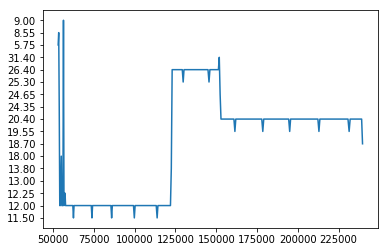

In [12]:
import matplotlib.pyplot as plt

service = 'AmazonRedshift'
account = '054649790173'

svc_df = valid_df[(valid_df['lineitem_productcode'] == service)
                  & (valid_df['lineitem_usageaccountid'] == account)
                  & (valid_df['enddatetime'] >= '2017-010-01')
                 ]
#print(svc_df['unblended'].head())
plt.plot(svc_df['unblended'])
plt.show()

In [ ]:
#################################################################################################################
# https://machinelearningmastery.com/time-series-forecasting-long-short-term-memory-network-python/
#
# To use batch_size of more than 1
#   https://machinelearningmastery.com/use-different-batch-sizes-training-predicting-python-keras/

In [13]:
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from pandas import concat

# frame a sequence as a supervised learning problem
def timeseries_to_supervised(data, lag=1):
    df = DataFrame(data)
    columns = [df.shift(i) for i in range(1, lag+1)]
    columns.append(df)
    df = concat(columns, axis=1)
    df.fillna(0, inplace=True)
    return df

In [20]:
from pandas import Series
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from math import sqrt
from matplotlib import pyplot
import numpy
from sklearn.metrics import mean_squared_error

In [21]:
###############################################
# 1. normalize data
# 2. transform normalized data to be supervised learning
# 3. split normalized data into train and test sets
###############################################

series = svc_df['unblended']
print("series:")
print(series.head())
print(len(series))

# transform scale
X = series.values
X = X.reshape(len(X), 1)
scaler = MinMaxScaler(feature_range=(-1, 1))
scaler = scaler.fit(X)
scaled_X = scaler.transform(X)
scaled_series = Series(scaled_X[:, 0])
print("\nscaled_series:")
print(scaled_series.head())

# invert transform
inverted_X = scaler.inverse_transform(scaled_X)
inverted_series = Series(inverted_X[:, 0])
print("\ninverted_series:")
print(inverted_series.head())

# transform normalized data to supervised learning
X = scaled_series.values
supervised = timeseries_to_supervised(X, 1)
print("\nsupervised:")
print(supervised)

# split data into train and test-sets
supervised_values = supervised.values
train_size = int(len(supervised_values) * 0.67)
test_size = len(supervised_values) - train_size
train, test = supervised_values[0:train_size,:], supervised_values[train_size:len(supervised_values),:]
print("\ntrain:")
print(train)
print("\ntest:")
print(test)
print(len(train), len(test))

series:
53150     5.75
53483     8.55
53805    24.35
54129    12.00
54432    12.00
Name: unblended, dtype: object
381

scaled_series:
0   -1.000000
1   -0.781676
2    0.450292
3   -0.512671
4   -0.512671
dtype: float64

inverted_series:
0     5.75
1     8.55
2    24.35
3    12.00
4    12.00
dtype: float64

supervised:
            0         0
0    0.000000 -1.000000
1   -1.000000 -0.781676
2   -0.781676  0.450292
3    0.450292 -0.512671
4   -0.512671 -0.512671
5   -0.512671 -0.434698
6   -0.434698 -0.044834
7   -0.044834 -0.512671
8   -0.512671 -0.512671
9   -0.512671 -0.512671
10  -0.512671 -0.746589
11  -0.746589 -0.512671
12  -0.512671 -0.493177
13  -0.493177 -0.493177
14  -0.493177 -0.512671
15  -0.512671 -0.512671
16  -0.512671 -0.512671
17  -0.512671 -0.512671
18  -0.512671 -0.512671
19  -0.512671 -0.512671
20  -0.512671 -0.512671
21  -0.512671 -0.512671
22  -0.512671 -0.512671
23  -0.512671 -0.512671
24  -0.512671 -0.512671
25  -0.512671 -0.512671
26  -0.512671 -0.512671
27  -0.5

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [24]:
###############################################
# 1. transform data to be supervised learning
# 2. split data into train and test sets
# 3. normalize both sets
###############################################

# scale train and test data to [-1, 1]
def scale(train, test):
    # fit scaler
    scaler = MinMaxScaler(feature_range=(-1, 1))
    scaler = scaler.fit(train)
    # transform train
    train = train.reshape(train.shape[0], train.shape[1])
    train_scaled = scaler.transform(train)
    # transform test
    test = test.reshape(test.shape[0], test.shape[1])
    test_scaled = scaler.transform(test)
    return scaler, train_scaled, test_scaled
 
# inverse scaling for a forecasted value
def invert_scale(scaler, X, value):
    new_row = [x for x in X] + [value]
    array = numpy.array(new_row)
    array = array.reshape(1, len(array))
    inverted = scaler.inverse_transform(array)
    return inverted[0, -1]

series = svc_df['unblended']
print("series:")
print(series.head())
print(len(series))

raw_values = series.values
raw_values = raw_values.astype('float32')
print("\nnumbers of raw_values:")
print(len(raw_values))

# transform data to be supervised learning
supervised = timeseries_to_supervised(series, 1)
supervised_values = supervised.values
#print("\nsupervised_values:")
#print(supervised_values)

# split data into train and test-sets
supervised_values = supervised.values
train_size = int(len(supervised_values) * 0.67)
test_size = len(supervised_values) - train_size
train, test = supervised_values[0:train_size,:], supervised_values[train_size:len(supervised_values),:]
#print("\ntrain:")
#print(train)
#print("\ntest:")
#print(test)
print(len(train), len(test))

# transform the scale of the data
scaler, train_scaled, test_scaled = scale(train, test)
#print("\ntrain_scaled:")
#print(train_scaled)
#print("\ntest_scaled:")
#print(test_scaled)

series:
53150     5.75
53483     8.55
53805    24.35
54129    12.00
54432    12.00
Name: unblended, dtype: object
381

numbers of raw_values:
381
255 126


/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [48]:
# fit an LSTM network to training data
def fit_lstm(train, batch_size, nb_epoch, neurons):
    X, y = train[:, 0:-1], train[:, -1]
    
    # Given that the training dataset is defined as X inputs and y outputs,
    # it must be reshaped into the Samples/TimeSteps/Features format
    X = X.reshape(X.shape[0], 1, X.shape[1])
    
    model = Sequential()
    model.add(LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    for i in range(nb_epoch):
        model.fit(X, y, epochs=1, batch_size=batch_size, verbose=1, shuffle=False)
        model.reset_states()
    return model

# fit the model
n_batch = len(train_scaled)
n_epoch = 1000
n_neurons = 10
lstm_model = fit_lstm(train_scaled, batch_size, n_epoch, n_neurons)

Epoch 1/1
255/255 [==============================] - 1s 5ms/step - loss: 0.0795
Epoch 1/1
255/255 [==============================] - 0s 2ms/step - loss: 0.0386
Epoch 1/1
255/255 [==============================] - 0s 2ms/step - loss: 0.0350
Epoch 1/1
255/255 [==============================] - 0s 2ms/step - loss: 0.0321
Epoch 1/1
255/255 [==============================] - 0s 2ms/step - loss: 0.0297
Epoch 1/1
255/255 [==============================] - 0s 2ms/step - loss: 0.0275
Epoch 1/1
255/255 [==============================] - 0s 2ms/step - loss: 0.0257
Epoch 1/1
255/255 [==============================] - 0s 2ms/step - loss: 0.0241
Epoch 1/1
255/255 [==============================] - 0s 2ms/step - loss: 0.0228
Epoch 1/1
255/255 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 1/1
255/255 [==============================] - 0s 2ms/step - loss: 0.0211
Epoch 1/1
255/255 [==============================] - 0s 2ms/step - loss: 0.0206
Epoch 1/1
255/255 [=====================

255/255 [==============================] - 0s 2ms/step - loss: 0.0153
Epoch 1/1
255/255 [==============================] - 0s 2ms/step - loss: 0.0152
Epoch 1/1
255/255 [==============================] - 0s 2ms/step - loss: 0.0152
Epoch 1/1
255/255 [==============================] - 0s 2ms/step - loss: 0.0152
Epoch 1/1
255/255 [==============================] - 0s 2ms/step - loss: 0.0151
Epoch 1/1
255/255 [==============================] - 0s 2ms/step - loss: 0.0151
Epoch 1/1
255/255 [==============================] - 0s 2ms/step - loss: 0.0151
Epoch 1/1
255/255 [==============================] - 0s 2ms/step - loss: 0.0150
Epoch 1/1
255/255 [==============================] - 0s 2ms/step - loss: 0.0149
Epoch 1/1
255/255 [==============================] - 0s 2ms/step - loss: 0.0149
Epoch 1/1
255/255 [==============================] - 0s 2ms/step - loss: 0.0149
Epoch 1/1
255/255 [==============================] - 0s 2ms/step - loss: 0.0149
Epoch 1/1
255/255 [==============================]

255/255 [==============================] - 0s 2ms/step - loss: 0.0144
Epoch 1/1
255/255 [==============================] - 0s 2ms/step - loss: 0.0145
Epoch 1/1
255/255 [==============================] - 0s 2ms/step - loss: 0.0145
Epoch 1/1
255/255 [==============================] - 0s 2ms/step - loss: 0.0146
Epoch 1/1
255/255 [==============================] - 0s 2ms/step - loss: 0.0146
Epoch 1/1
255/255 [==============================] - 0s 2ms/step - loss: 0.0146
Epoch 1/1
255/255 [==============================] - 0s 2ms/step - loss: 0.0146
Epoch 1/1
255/255 [==============================] - 0s 2ms/step - loss: 0.0146
Epoch 1/1
255/255 [==============================] - 0s 2ms/step - loss: 0.0146
Epoch 1/1
255/255 [==============================] - 0s 2ms/step - loss: 0.0146
Epoch 1/1
255/255 [==============================] - 0s 2ms/step - loss: 0.0145
Epoch 1/1
255/255 [==============================] - 0s 2ms/step - loss: 0.0145
Epoch 1/1
255/255 [==============================]

255/255 [==============================] - 0s 2ms/step - loss: 0.0095
Epoch 1/1
255/255 [==============================] - 0s 2ms/step - loss: 0.0094
Epoch 1/1
255/255 [==============================] - 0s 2ms/step - loss: 0.0096
Epoch 1/1
255/255 [==============================] - 0s 2ms/step - loss: 0.0094
Epoch 1/1
255/255 [==============================] - 0s 2ms/step - loss: 0.0096
Epoch 1/1
255/255 [==============================] - 0s 2ms/step - loss: 0.0094
Epoch 1/1
255/255 [==============================] - 0s 2ms/step - loss: 0.0094
Epoch 1/1
255/255 [==============================] - 0s 2ms/step - loss: 0.0094
Epoch 1/1
255/255 [==============================] - 0s 2ms/step - loss: 0.0094
Epoch 1/1
255/255 [==============================] - 0s 2ms/step - loss: 0.0094A: 0s - loss
Epoch 1/1
255/255 [==============================] - 0s 2ms/step - loss: 0.0094
Epoch 1/1
255/255 [==============================] - 0s 2ms/step - loss: 0.0094
Epoch 1/1
255/255 [===================

Epoch 1/1
255/255 [==============================] - 0s 2ms/step - loss: 0.0082
Epoch 1/1
255/255 [==============================] - 0s 2ms/step - loss: 0.0084
Epoch 1/1
255/255 [==============================] - 0s 2ms/step - loss: 0.0082
Epoch 1/1
255/255 [==============================] - 0s 2ms/step - loss: 0.0085
Epoch 1/1
255/255 [==============================] - 0s 2ms/step - loss: 0.0080
Epoch 1/1
255/255 [==============================] - 0s 2ms/step - loss: 0.0099
Epoch 1/1
255/255 [==============================] - 0s 2ms/step - loss: 0.0086
Epoch 1/1
255/255 [==============================] - 0s 2ms/step - loss: 0.0148
Epoch 1/1
255/255 [==============================] - 0s 2ms/step - loss: 0.0098
Epoch 1/1
255/255 [==============================] - 0s 2ms/step - loss: 0.0084
Epoch 1/1
255/255 [==============================] - 0s 2ms/step - loss: 0.0085
Epoch 1/1
255/255 [==============================] - 0s 2ms/step - loss: 0.0083
Epoch 1/1
255/255 [=====================

255/255 [==============================] - 0s 2ms/step - loss: 0.0091
Epoch 1/1
255/255 [==============================] - 0s 2ms/step - loss: 0.0079
Epoch 1/1
255/255 [==============================] - 0s 2ms/step - loss: 0.0077
Epoch 1/1
255/255 [==============================] - 0s 2ms/step - loss: 0.0077
Epoch 1/1
255/255 [==============================] - 0s 2ms/step - loss: 0.0076
Epoch 1/1
255/255 [==============================] - 0s 2ms/step - loss: 0.0078
Epoch 1/1
255/255 [==============================] - 0s 2ms/step - loss: 0.0077
Epoch 1/1
255/255 [==============================] - 0s 2ms/step - loss: 0.0089
Epoch 1/1
255/255 [==============================] - 0s 2ms/step - loss: 0.0090
Epoch 1/1
255/255 [==============================] - 0s 2ms/step - loss: 0.0089
Epoch 1/1
255/255 [==============================] - 0s 2ms/step - loss: 0.0088
Epoch 1/1
255/255 [==============================] - 0s 2ms/step - loss: 0.0079
Epoch 1/1
255/255 [==============================]

255/255 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 1/1
255/255 [==============================] - 0s 2ms/step - loss: 0.0078
Epoch 1/1
255/255 [==============================] - 0s 2ms/step - loss: 0.0099
Epoch 1/1
255/255 [==============================] - 0s 2ms/step - loss: 0.0079
Epoch 1/1
255/255 [==============================] - 0s 2ms/step - loss: 0.5890
Epoch 1/1
255/255 [==============================] - 0s 2ms/step - loss: 0.0952
Epoch 1/1
255/255 [==============================] - 0s 2ms/step - loss: 0.0211
Epoch 1/1
255/255 [==============================] - 0s 2ms/step - loss: 0.0168
Epoch 1/1
255/255 [==============================] - 0s 2ms/step - loss: 0.0146
Epoch 1/1
255/255 [==============================] - 0s 2ms/step - loss: 0.0131
Epoch 1/1
255/255 [==============================] - 0s 2ms/step - loss: 0.0119
Epoch 1/1
255/255 [==============================] - 0s 2ms/step - loss: 0.0112
Epoch 1/1
255/255 [==============================]

255/255 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 1/1
255/255 [==============================] - 0s 2ms/step - loss: 0.0113
Epoch 1/1
255/255 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 1/1
255/255 [==============================] - 0s 2ms/step - loss: 0.0113- ETA: 0s - loss:
Epoch 1/1
255/255 [==============================] - 0s 2ms/step - loss: 0.0109
Epoch 1/1
255/255 [==============================] - 0s 2ms/step - loss: 0.0114
Epoch 1/1
255/255 [==============================] - 0s 2ms/step - loss: 0.0109
Epoch 1/1
255/255 [==============================] - 0s 2ms/step - loss: 0.0115
Epoch 1/1
255/255 [==============================] - 0s 2ms/step - loss: 0.0109
Epoch 1/1
255/255 [==============================] - 0s 2ms/step - loss: 0.0114
Epoch 1/1
255/255 [==============================] - 0s 2ms/step - loss: 0.0110
Epoch 1/1
255/255 [==============================] - 0s 2ms/step - loss: 0.0114
Epoch 1/1
255/255 [==============

255/255 [==============================] - 0s 2ms/step - loss: 0.0125
Epoch 1/1
255/255 [==============================] - 0s 2ms/step - loss: 0.0119
Epoch 1/1
255/255 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 1/1
255/255 [==============================] - 0s 2ms/step - loss: 0.0119
Epoch 1/1
255/255 [==============================] - 0s 2ms/step - loss: 0.0125
Epoch 1/1
255/255 [==============================] - 0s 2ms/step - loss: 0.0119
Epoch 1/1
255/255 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 1/1
255/255 [==============================] - 0s 2ms/step - loss: 0.0119
Epoch 1/1
255/255 [==============================] - 0s 2ms/step - loss: 0.0125
Epoch 1/1
255/255 [==============================] - 0s 2ms/step - loss: 0.0119
Epoch 1/1
255/255 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 1/1
255/255 [==============================] - 0s 2ms/step - loss: 0.0119
Epoch 1/1
255/255 [==============================]

255/255 [==============================] - 0s 2ms/step - loss: 0.0127
Epoch 1/1
255/255 [==============================] - 0s 2ms/step - loss: 0.0126
Epoch 1/1
255/255 [==============================] - 0s 2ms/step - loss: 0.0127
Epoch 1/1
255/255 [==============================] - 0s 2ms/step - loss: 0.0129
Epoch 1/1
255/255 [==============================] - 0s 2ms/step - loss: 0.0129
Epoch 1/1
255/255 [==============================] - 0s 2ms/step - loss: 0.0125
Epoch 1/1
255/255 [==============================] - 0s 2ms/step - loss: 0.0126
Epoch 1/1
255/255 [==============================] - ETA: 0s - loss: 0.014 - 0s 2ms/step - loss: 0.0127
Epoch 1/1
255/255 [==============================] - 0s 2ms/step - loss: 0.0128
Epoch 1/1
255/255 [==============================] - 0s 2ms/step - loss: 0.0131
Epoch 1/1
255/255 [==============================] - 0s 2ms/step - loss: 0.0131
Epoch 1/1
255/255 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 1/1
255/255 [=======

In [55]:
# re-define the batch size
def new_lstm(lstm_model, train, neurons, n_batch=1):
    X, y = train[:, 0:-1], train[:, -1]
    X = X.reshape(X.shape[0], 1, X.shape[1])
    # re-define model
    new_model = Sequential()
    new_model.add(LSTM(neurons, batch_input_shape=(n_batch, X.shape[1], X.shape[2]), stateful=True))
    new_model.add(Dense(1))
    # copy weights
    old_weights = lstm_model.get_weights()
    new_model.set_weights(old_weights)
    # compile model
    new_model.compile(loss='mean_squared_error', optimizer='adam')
    return new_model

new_batch_size = 1
new_model = new_lstm(lstm_model, train_scaled, n_neurons, new_batch_size)
display(new_model)

In [56]:
# forecast the entire training dataset to build up state for forecasting
train_reshaped = train_scaled[:, 0].reshape(len(train_scaled), 1, 1)
new_model.predict(train_reshaped, batch_size=new_batch_size)

array([[-0.98492372],
       [-0.6036135 ],
       [ 0.51348984],
       [ 0.61564255],
       [-0.58680815],
       [-0.41214171],
       [-0.1830284 ],
       [-0.14444464],
       [-0.62832469],
       [-0.155422  ],
       [-0.38155168],
       [-0.78006601],
       [-0.24796802],
       [-0.38117787],
       [-0.52070177],
       [-0.26564246],
       [-0.38197535],
       [-0.50149632],
       [-0.3493019 ],
       [-0.39320865],
       [-0.4734067 ],
       [-0.38841805],
       [-0.39298925],
       [-0.45308742],
       [-0.40505773],
       [-0.39808354],
       [-0.43705246],
       [-0.41388258],
       [-0.40245497],
       [-0.47293848],
       [-0.43540934],
       [-0.41993329],
       [-0.42039195],
       [-0.41747719],
       [-0.41399112],
       [-0.41566047],
       [-0.41709214],
       [-0.4143129 ],
       [-0.41605914],
       [-0.41665372],
       [-0.41545719],
       [-0.41581425],
       [-0.41667414],
       [-0.41569752],
       [-0.41593042],
       [-0

In [57]:
# make a one-step forecast
def forecast_lstm(model, batch_size, X):
    X = X.reshape(1, 1, len(X))
    yhat = model.predict(X, batch_size=batch_size)
    return yhat[0,0]

# walk-forward validation on the test data
predictions = list()
for i in range(len(test_scaled)):
    # make one-step forecast
    X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
    yhat = forecast_lstm(lstm_model, new_batch_size, X)
    # invert scaling
    yhat = invert_scale(scaler, X, yhat)
    # store forecast
    predictions.append(yhat)
    #expected = raw_values[len(train) + i + 1]
    expected = raw_values[len(train) + i]
    print('Day=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))

Day=1, Predicted=16.294733, Expected=20.400000
Day=2, Predicted=21.376591, Expected=20.400000
Day=3, Predicted=23.553511, Expected=20.400000
Day=4, Predicted=26.057782, Expected=20.400000
Day=5, Predicted=27.013836, Expected=20.400000
Day=6, Predicted=27.227850, Expected=20.400000
Day=7, Predicted=27.167970, Expected=20.400000
Day=8, Predicted=27.191450, Expected=20.400000
Day=9, Predicted=27.180609, Expected=20.400000
Day=10, Predicted=27.185837, Expected=20.400000
Day=11, Predicted=27.184730, Expected=20.400000
Day=12, Predicted=27.185488, Expected=20.400000
Day=13, Predicted=27.185492, Expected=20.400000
Day=14, Predicted=27.185599, Expected=20.400000
Day=15, Predicted=27.185643, Expected=20.400000
Day=16, Predicted=27.185663, Expected=20.400000
Day=17, Predicted=27.185681, Expected=20.400000
Day=18, Predicted=27.185686, Expected=20.400000
Day=19, Predicted=27.185692, Expected=19.549999
Day=20, Predicted=27.047795, Expected=20.400000
Day=21, Predicted=26.963422, Expected=20.400000
D

Test RMSE: 6.744


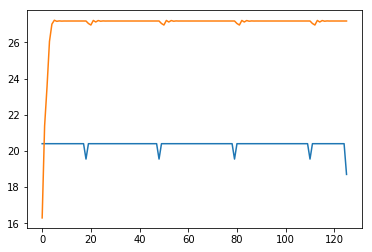

In [58]:
# report performance
rmse = sqrt(mean_squared_error(raw_values[len(train):], predictions))
print('Test RMSE: %.3f' % rmse)

# line plot of observed vs predicted
pyplot.plot(raw_values[len(train):])
pyplot.plot(predictions)
pyplot.show()